## Scoring / Classification

### Préparation des données

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

titanic = pd.read_csv("../titanic/data/train.csv")
def Prepare_Modele(X, cabin):
    target = X.Survived
    sexe = pd.get_dummies(X['Sex'], prefix='sex')
    cabin = pd.get_dummies(cabin.str[0], prefix='Cabin')
    age = X['Age'].fillna(X['Age'].mean())
    X = X[['Pclass', 'SibSp']].join(cabin).join(sexe).join(age)
    return X, target
cabin = titanic['Cabin'].fillna('X')
X, y = Prepare_Modele(titanic, cabin)
X.head(3)

,Pclass,SibSp,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,sex_female,sex_male,Age
0,3,1,0,0,0,0,0,0,0,0,1,0,1,22.0
1,1,1,0,0,1,0,0,0,0,0,0,1,0,38.0
2,3,0,0,0,0,0,0,0,0,0,1,1,0,26.0


### Classification "dummy"

In [5]:
dummy = DummyClassifier()
dummy.fit(X, y)
p_dm = dummy.predict(X)
dummy.score(X, y)

0.5331088664421998

### Classification avec une régression linéaire

In [3]:
lr1 = LogisticRegression()
lr1.fit(X, y)
p_rl = lr1.predict(X)
lr1.score(X, y)

0.8103254769921436

### Classification avec forets aléatoires (Random Forest)

In [4]:

tree = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
tree.fit(X, y)
p_tr = tree.predict(X)
tree.score(X, y)

0.9214365881032548

## Matrice de confusion

In [18]:
from sklearn.metrics import confusion_matrix
c_dm = confusion_matrix (y, p_dm)
print ("Matrice de confusion / Dummy\n", c_dm)
c_rl = confusion_matrix (y, p_rl)
print ("Matrice de confusion / Reg. Linéaire\n", c_rl)
c_tr = confusion_matrix (y, p_tr)
print ("Matrice de confusion / Random Foret\n", c_tr)

Matrice de confusion / Dummy
 [[318 231]
 [200 142]]
Matrice de confusion / Reg. Linéaire
 [[473  76]
 [ 93 249]]
Matrice de confusion / Random Foret
 [[525  24]
 [ 46 296]]


## Calcul du score f1 (mesure f)

In [17]:
from sklearn.metrics import f1_score
f1_rl = f1_score(y, p_rl)
f1_tr = f1_score(y, p_tr)
f1_dm = f1_score(y, p_dm)
print ("f1 Score / Dummy\n", f1_dm)
print ("f1 Score / Reg. Lin.\n", f1_rl)
print ("f1 Score / Foret\n", f1_tr)

f1 Score / Dummy
 0.39720279720279716
f1 Score / Reg. Lin.
 0.7466266866566716
f1 Score / Foret
 0.8942598187311178


## Précision, rappel & f-mesure

In [9]:
print("Dummy\n", classification_report(y, p_dm))

Dummy
              precision    recall  f1-score   support

          0       0.61      0.58      0.60       549
          1       0.38      0.42      0.40       342

avg / total       0.52      0.52      0.52       891



In [8]:
from sklearn.metrics import classification_report
print("Régression linéaire\n", classification_report(y, p_rl))

Régression linéaire
              precision    recall  f1-score   support

          0       0.84      0.86      0.85       549
          1       0.77      0.73      0.75       342

avg / total       0.81      0.81      0.81       891



In [16]:
print("Random Forest\n", classification_report(y, p_tr))

Random Forest
              precision    recall  f1-score   support

          0       0.92      0.96      0.94       549
          1       0.93      0.87      0.89       342

avg / total       0.92      0.92      0.92       891



## Courbe de ROC

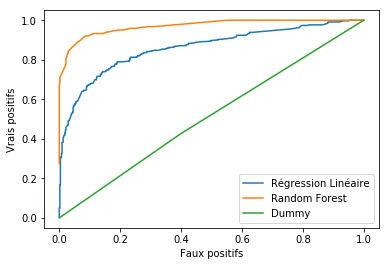

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

faux_positifs_rl, vrais_positifs_rl, seuil_rl = roc_curve(y, lr1.decision_function(X))
plt.plot(faux_positifs_rl, vrais_positifs_rl, label="Régression Linéaire")
faux_positifs_tr, vrais_positifs_tr, seuil_tr = roc_curve(y, tree.predict_proba(X)[:,1])
plt.plot(faux_positifs_tr, vrais_positifs_tr, label="Random Forest")
faux_positifs_dm, vrais_positifs_dm, seuil_dm = roc_curve(y, dummy.predict_proba(X)[:,1])
plt.plot(faux_positifs_dm, vrais_positifs_dm, label="Dummy")

plt.xlabel ("Faux positifs")
plt.ylabel ("Vrais positifs")
plt.legend ()

## Surface AUC

In [19]:
from sklearn import metrics
print ("AUC Dummy: ",metrics.auc(faux_positifs_dm, vrais_positifs_dm))
print ("AUC Reg. linéaire: ",metrics.auc(faux_positifs_rl, vrais_positifs_rl))
print ("AUC Random Forest: ",metrics.auc(faux_positifs_tr, vrais_positifs_tr))

AUC Dummy:  0.5134454989933851
AUC Reg. linéaire:  0.860642422693041
AUC Random Forest:  0.9708374609870152
